In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import random
from matplotlib import rc


In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)
y=np.array([-1 if i==0 else 1 for i in y])

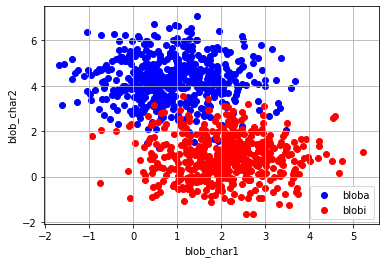

In [3]:
f1 = 0
f2 = 1
fig, ax = plt.subplots()

line, = ax.plot([], [], 'k-')

ax.scatter(X[y==-1, 0], X[y==-1, 1], c='b', label="bloba")
ax.scatter(X[y==1, 0], X[y==1, 1], c='r', label="blobi")
ax.legend(loc='lower right')

ax.set_xlabel("blob_char1")
#ax.set_xlim(0, 6)
ax.set_ylabel("blob_char2")
#ax.set_ylim(0, 2)

x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 2)

ax.grid(True)

In [4]:
def funcion_perdida(obs,res,theta_0,theta_1):
    hiperplanos=np.array([(np.dot(theta_1,i) + theta_0) for i in obs])
    res=res.reshape(-1,1)
    hiperplanos=hiperplanos*res
    return(np.array([0 if z>=1 else int(1-z) for z in hiperplanos]).reshape(-1,1))

In [5]:
def funcion_objetivo(obs,res,theta_0,theta_1,_lambda):
    return(np.mean(funcion_perdida(obs,res,np.array([theta_0]),theta_1)) + (_lambda/2)*math.pow(np.linalg.norm(theta_1),2))

funcion_objetivo(X,y,1,np.array([1,2]),15)

42.976000000000006

In [6]:
def derivada_perdida(obs,res,theta_0,theta_1):
    hiperplanos=(np.array([(np.dot(np.transpose(theta_1),i) + theta_0) for i in obs])*res).reshape(-1,1)
    return(np.array([-1 if v<1 else 0 for v in hiperplanos]).reshape(-1,1))

#derivada_perdida(X,y,1,[1,1])

In [16]:
def descenso_mvs(obs,res,theta_0,theta_1,eta,_lambda,E):
    v0=theta_0
    v1=theta_1
    resta=100
    lista_thetas=[]
    while resta>E:
        
        antes=funcion_objetivo(obs,res,v0,v1,_lambda)       
        v1=v1-eta*(np.mean((derivada_perdida(obs,res,v0,v1)*res.reshape(-1,1)*obs),axis=0)+_lambda*v1)
        v0=v0-eta*np.mean(derivada_perdida(obs,res,v0,v1)*res.reshape(-1,1))
        despues=funcion_objetivo(obs,res,v0,v1,_lambda)
        
        #lista_thetas.append((np.array([v0]),v1))
        resta=abs(despues-antes)

        #print(resta)

    return v0,v1

    

In [8]:
lista_thetas=descenso_mvs(X,y,0,np.array([0,0]),.1,0,.001)

0.728
0.03200000000000003
0.10599999999999998
0.033
0.014000000000000012
0.011999999999999997
0.0030000000000000027
0.0


/tmp/ipykernel_665/3973199395.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(lista_thetas)


In [9]:
def descenso_estocastico(obs,res,T,_lambda):
    theta=np.zeros(obs.shape[1])
    theta0=0
    thetas=[]
    for t in range(T):
        random_num=random.randint(0,obs.shape[0]-1)
        random_obs = obs[random_num]
        random_res= res[random_num]
        thetas.append((np.array(theta0),theta))
        theta=theta-(20/(t+1))*(np.mean((derivada_perdida(random_obs,random_res,theta0,theta)*random_res*random_obs),axis=0)+_lambda*theta)
        theta0=theta0-(20/(t+1))*np.mean(derivada_perdida(random_obs,random_res,theta0,theta)*random_res.reshape(-1,1))
    return(np.array(thetas))


In [10]:
lista_thetas_estoc=descenso_estocastico(X,y,100,.5)


/tmp/ipykernel_665/28863647.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.array(thetas))


In [11]:
lista_thetas.reshape(-1,2)

array([[array([0.0017]), array([ 0.05841166, -0.16898411])],
       [array([0.0418]), array([ 0.11739332, -0.32712026])],
       [array([0.0734]), array([ 0.20564266, -0.3171768 ])],
       [array([0.1009]), array([ 0.2793332, -0.3377476])],
       [array([0.1255]), array([ 0.33956121, -0.36578774])],
       [array([0.1468]), array([ 0.39125474, -0.39034428])],
       [array([0.1653]), array([ 0.43051988, -0.41425521])],
       [array([0.1832]), array([ 0.4618875 , -0.43609904])]], dtype=object)

In [12]:
def anima(i):

    y=np.zeros(len(x))
    cont=0
    for val in x:
        y[cont]=-(lista_thetas[i][1][0]*val + lista_thetas[i][0])/(lista_thetas[i][1][1])
        #y[cont]=lista_thetas[i][1][0]*val + lista_thetas[i][]
        cont=cont+1

    line.set_data(x, y)
    return line,

animacion = animation.FuncAnimation(fig, anima, frames=lista_thetas.shape[0], interval=100, blit=True)

In [13]:
rc('animation', html='jshtml')
animacion

In [18]:
def cross_validate(obs,res,theta_0,theta_1,eta,_lambda,E,k):
    error=0
    for i in range(k):
        train_X, test_X, train_Y, test_Y= chunks(X, y, k)
        theta_0,theta_1=descenso_mvs(train_X,train_Y,theta_0,theta_1,eta,_lambda,E)
        prediction=np.array([-1 if (np.dot(i, theta_1) + theta_0)<0 else 1 for i in test_X]).reshape(-1,1)
    for i in test_Y:
        if prediction.all()!=i:
            error+=1
        else:
            error=0
    return error/len(test_Y)

def chunks(X, y, k):
    i = int((1 - k) * X.shape[0]) 
    o = np.random.permutation(X.shape[0])
    X_train, X_test = np.split(np.take(X,o,axis=0), [i])
    y_train, y_test = np.split(np.take(y,o), [i])
    
    return X_train, X_test, y_train, y_test
cross_validate(X,y,0,np.array([0,0]),.1,.5,1,5)

0.001